In [8]:
import torch
from torch import nn

In [13]:
def corr2d(X,k):
  h,w = K.shape
  Y = torch.zeros((X.shape[0] - h + 1 ,X.shape[1] - w + 1))
  for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
      Y[i,j] = (X[i:i+h,j: j+w] * K).sum()
  return Y

In [14]:
X = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = torch.Tensor([[0, 1], [2, 3]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

# Фильтр

In [15]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [16]:
# вертикальные грани есть
K = torch.Tensor([[1, -1]])
Y = corr2d(X, K)
print(X)
print(Y)

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])
tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])


In [17]:
# вертикальных граней нет
Z = corr2d(X.T, K)
print(X.T)
print(Z)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [18]:
import cv2
import numpy as np
from scipy import misc
img = misc.ascent()
img = torch.Tensor(img)

/tmp/ipykernel_2277287/1927474372.py:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  img = misc.ascent()


In [19]:
img_transformed = torch.clone(img)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]


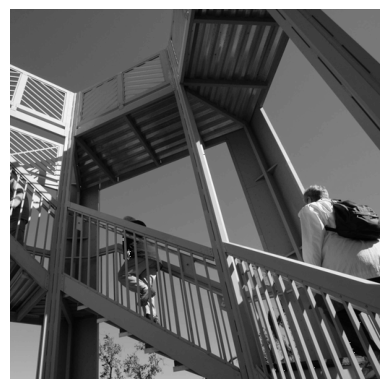

In [20]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(img)
plt.show()


# Усредняющий фильтр

In [21]:
filter_ = torch.tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
print(filter_.shape)
filter_

torch.Size([3, 3])


tensor([[0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111]])

In [23]:
def apply_filter(img, filter_):
    for x in range(1, size_x-1):
        for y in range(1, size_y-1):
            convolution = 0.0

            dimg = img[x-1:x+2, y-1:y+2] 
            convolution = torch.sum(dimg * filter_)

            if convolution < 0:
                convolution = 0
            if convolution > 255:
                convolution = 255
            img_transformed[x, y] = convolution
    return img_transformed
  

In [24]:
def plot_image(img, img_transformed):
    # Plot the image. 512 by 512
    plt.figure(figsize=(15,7))
    plt.gray()
    plt.grid(False)
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(img_transformed)
    #plt.axis('off')
    plt.show()

    ymin,ymax,xmin,xmax = 100,200,0,100

    plt.figure(figsize=(15,7))
    plt.gray()
    plt.grid(False)
    plt.subplot(1,2,1)
    plt.imshow(img[ymin:ymax,xmin:xmax])
    plt.subplot(1,2,2)
    plt.imshow(img_transformed[ymin:ymax,xmin:xmax])
    #plt.axis('off')
    plt.show() 

/tmp/ipykernel_2277287/17146804.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


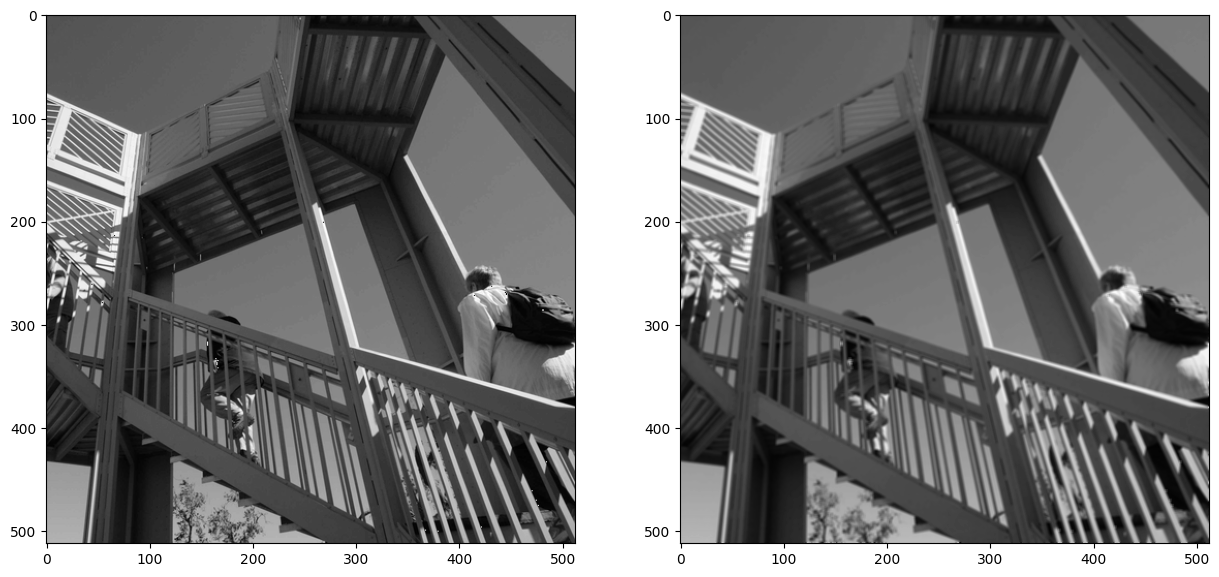

/tmp/ipykernel_2277287/17146804.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


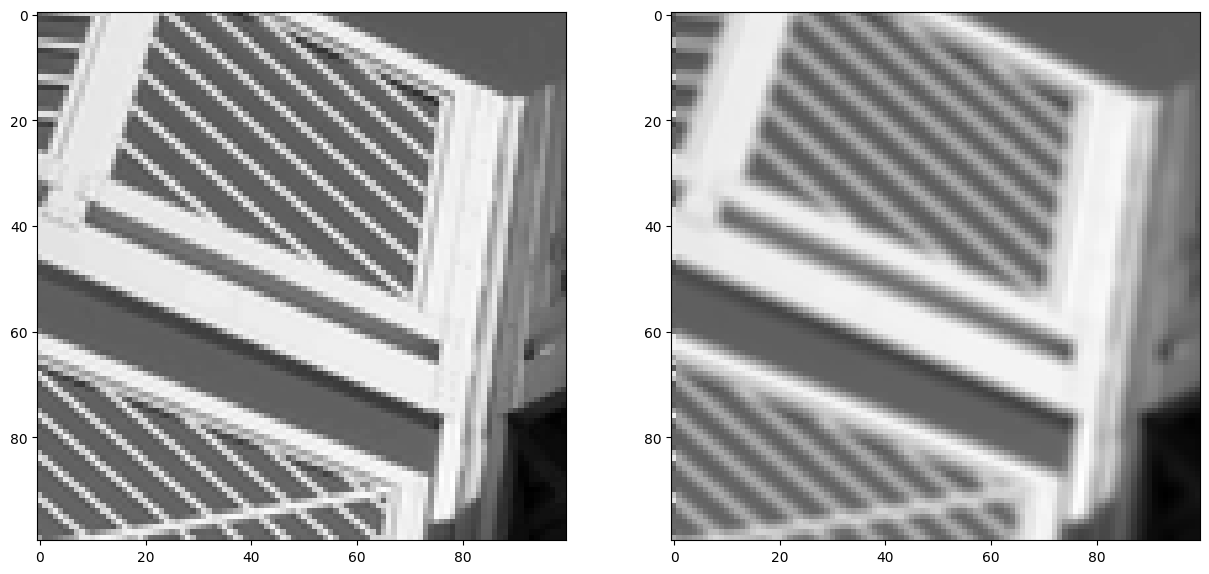

In [25]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

In [26]:
filter_ = torch.tensor([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
print(filter_.shape)
filter_

torch.Size([3, 3])


tensor([[-1, -1, -1],
        [-1,  9, -1],
        [-1, -1, -1]])

/tmp/ipykernel_2277287/17146804.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


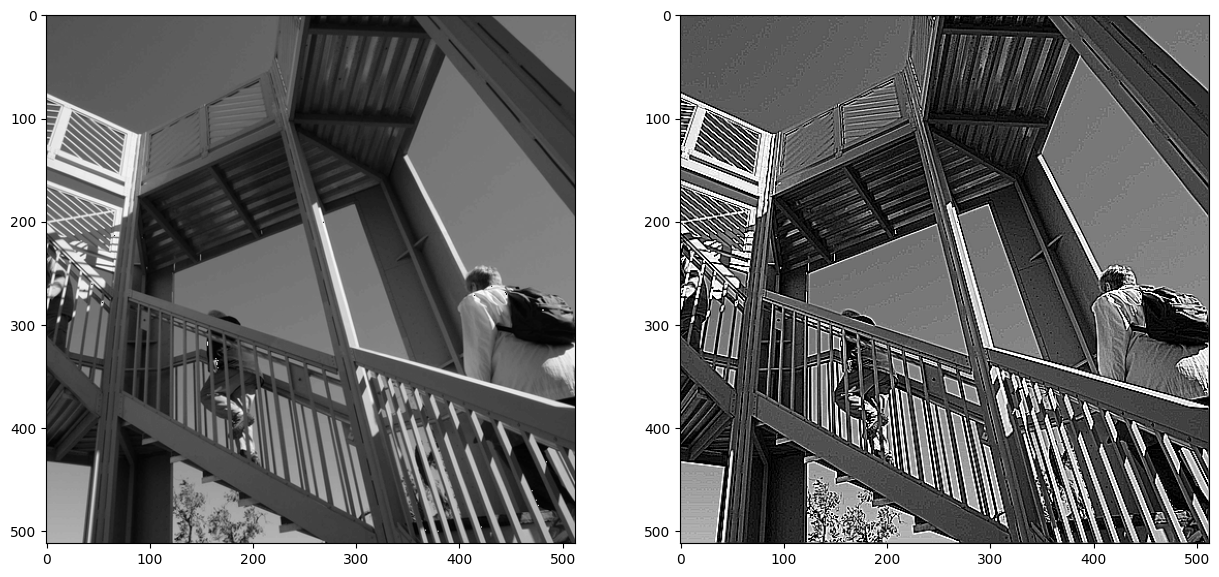

/tmp/ipykernel_2277287/17146804.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


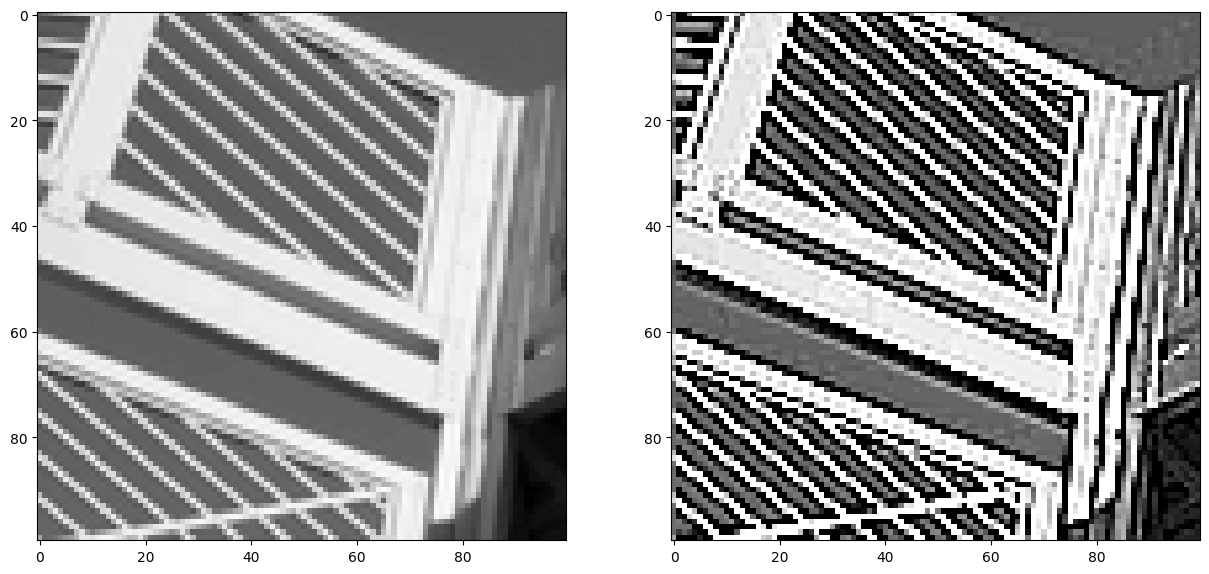

In [27]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

# Обнаружение линий по горизонтали

In [28]:
filter_ = torch.tensor([[-1, -1, -1], [2,  2,  2], [-1, -1, -1]])
print(filter_.shape)
filter_

torch.Size([3, 3])


tensor([[-1, -1, -1],
        [ 2,  2,  2],
        [-1, -1, -1]])

/tmp/ipykernel_2277287/17146804.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


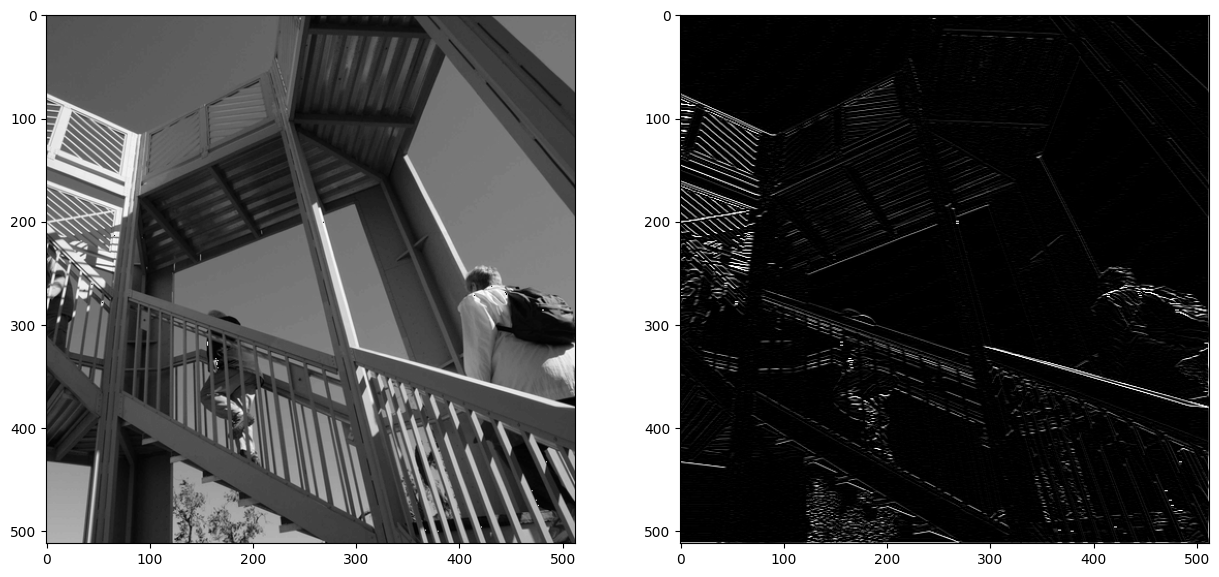

/tmp/ipykernel_2277287/17146804.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


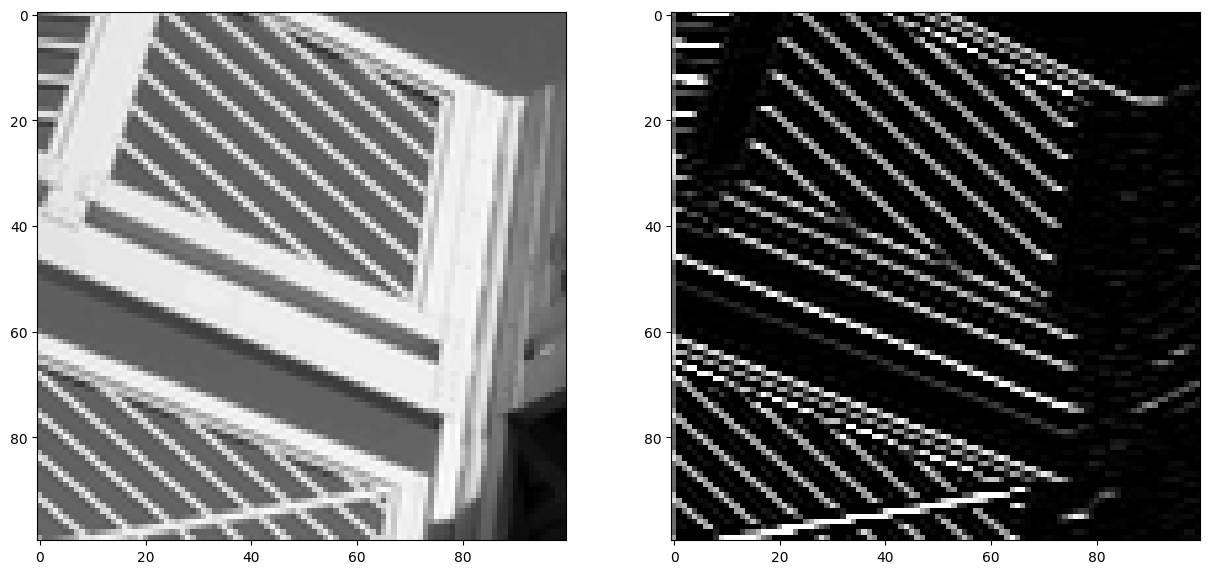

In [29]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

#  Сверточный слой

In [30]:
X = X.reshape(1, 1, 6, 8)
Y = Y.reshape(1, 1, 6, 7)
X

tensor([[[[1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.]]]])

In [31]:
conv2d = torch.nn.Conv2d(in_channels=1,
                         out_channels=1,
                         kernel_size=(1,2))

In [32]:
optimizer = torch.optim.SGD(conv2d.parameters(), lr=0.1)

In [34]:
criterion = nn.MSELoss()

In [35]:
for i in range(200):
    optimizer.zero_grad()
    Y_hat = conv2d(X)
    l = criterion(Y_hat,Y)
    l.backward()
    optimizer.step()
    if (i + 1) % 10 == 0:
        print(f'batch {i + 1}, loss {l.item():.3f}')

batch 10, loss 0.403
batch 20, loss 0.225
batch 30, loss 0.126
batch 40, loss 0.071
batch 50, loss 0.040
batch 60, loss 0.022
batch 70, loss 0.012
batch 80, loss 0.007
batch 90, loss 0.004
batch 100, loss 0.002
batch 110, loss 0.001
batch 120, loss 0.001
batch 130, loss 0.000
batch 140, loss 0.000
batch 150, loss 0.000
batch 160, loss 0.000
batch 170, loss 0.000
batch 180, loss 0.000
batch 190, loss 0.000
batch 200, loss 0.000


In [36]:
print(conv2d.weight)
print(conv2d.bias)

Parameter containing:
tensor([[[[ 0.9953, -0.9953]]]], requires_grad=True)
Parameter containing:
tensor([-3.1674e-06], requires_grad=True)


# Padding и stride

In [40]:
conv2d = nn.Conv2d(1,1,kernel_size = 3, padding = 1)
X = torch.randn((1,1,8,8))
conv2d(X).shape

torch.Size([1, 1, 8, 8])

In [41]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 4, 4])

# Каналы

In [42]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 8, 8])

In [43]:
conv2d.weight.shape

torch.Size([1, 1, 3, 3])

In [56]:
conv2d = nn.Conv2d(3, 32, kernel_size=3, padding=1)
X = torch.randn((1, 3, 8, 8))
conv2d(X).shape

torch.Size([1, 32, 8, 8])

In [45]:
conv2d.weight.shape

torch.Size([32, 3, 3, 3])

# Pooling

In [57]:
#meanpool

/tmp/ipykernel_2277287/1096728076.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


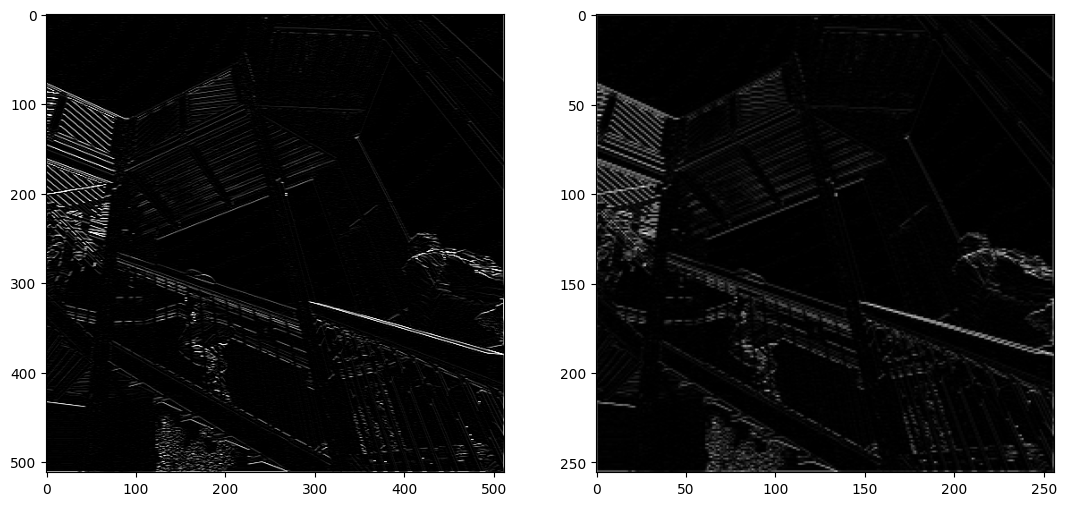

In [46]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
new_img = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(img_transformed[x, y])
        pixels.append(img_transformed[x+1, y])
        pixels.append(img_transformed[x, y+1])
        pixels.append(img_transformed[x+1, y+1])
        new_img[int(x/2), int(y/2)] = np.mean(pixels)


plt.figure(figsize=(13,6))
plt.gray()
plt.grid(False)

plt.subplot(1,2,1)
plt.imshow(img_transformed)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()

/tmp/ipykernel_2277287/750020361.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


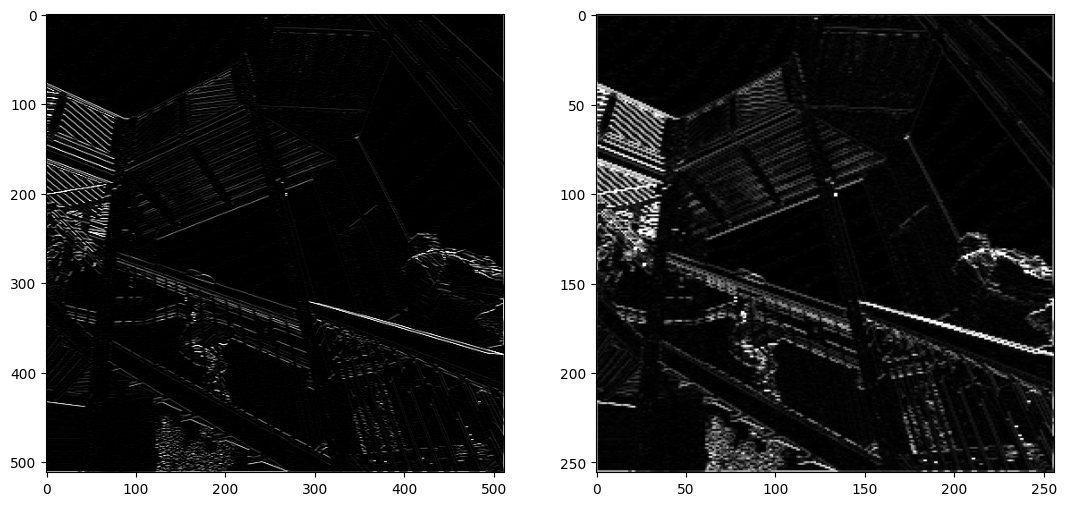

In [58]:
#Maxpool
new_x = int(size_x / 2)
new_y = int(size_y / 2)
new_img = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(img_transformed[x, y])
        pixels.append(img_transformed[x+1, y])
        pixels.append(img_transformed[x, y+1])
        pixels.append(img_transformed[x+1, y+1])
        new_img[int(x/2), int(y/2)] = np.max(pixels)


plt.figure(figsize=(13,6))
plt.gray()
plt.grid(False)

plt.subplot(1,2,1)
plt.imshow(img_transformed)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()

In [61]:
X = torch.arange(16).reshape((1, 1, 4, 4)).type(torch.float)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [62]:
pool2d = nn.MaxPool2d(2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [63]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [64]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [65]:
pool2d = nn.MaxPool2d((2, 3), padding=(1, 1), stride=(2, 3))
pool2d(X)

tensor([[[[ 1.,  3.],
          [ 9., 11.],
          [13., 15.]]]])

In [66]:
X = torch.cat((X, X + 1), dim=1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [67]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

# Lenet

In [95]:
import torchvision as tv
import time
import matplotlib.pyplot as plt

In [96]:
BATCH_SIZE = 256

In [97]:
transforms = tv.transforms.Compose([
    tv.transforms.Resize(32),
    tv.transforms.ToTensor()
])

In [98]:

train_dataset = tv.datasets.MNIST('.',
                                  train=True,
                                  transform=transforms,
                                  download=True)

test_dataset = tv.datasets.MNIST('.',
                                 train=False,
                                 transform=transforms,
                                 download=True)

train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

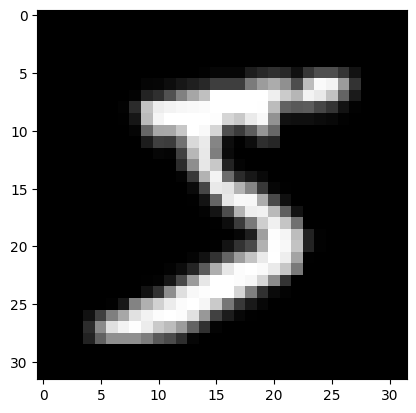

In [99]:
plt.imshow(train_dataset[0][0].numpy().reshape(32,32), cmap='gray');

In [81]:
model = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=0),
    nn.Tanh(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.Tanh(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(16, 120, kernel_size=5),
    nn.Flatten(),
    nn.Linear(120, 84),
    nn.Tanh(),
    nn.Linear(84, 10)
)

In [85]:
from torchsummary import summary

summary(model, input_size=(1, 32, 32), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7            [-1, 120, 1, 1]          48,120
           Flatten-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             Tanh-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

In [84]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 32, 32)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 1, 32, 32])
Layer Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 6, 28, 28])
Layer Tanh(). X shape: torch.Size([1, 6, 28, 28])
Layer AvgPool2d(kernel_size=2, stride=2, padding=0). X shape: torch.Size([1, 6, 14, 14])
Layer Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 16, 10, 10])
Layer Tanh(). X shape: torch.Size([1, 16, 10, 10])
Layer AvgPool2d(kernel_size=2, stride=2, padding=0). X shape: torch.Size([1, 16, 5, 5])
Layer Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 120, 1, 1])
Layer Flatten(start_dim=1, end_dim=-1). X shape: torch.Size([1, 120])
Layer Linear(in_features=120, out_features=84, bias=True). X shape: torch.Size([1, 84])
Layer Tanh(). X shape: torch.Size([1, 84])
Layer Linear(in_features=84, out_features=10, bias=True). X shape: torch.Size([1, 10])


In [86]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 32, 32)
y = model(X)
print(y.shape)

torch.Size([1, 10])


In [87]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = torch.Tensor([0]), 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [88]:

def train(net, train_iter, test_iter, optimizer, num_epochs):
    loss = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
    
        for X, y in train_iter:
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
    
        test_acc = evaluate_accuracy(test_iter, net)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}' \
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

In [89]:
lr, num_epochs = 0.01, 5
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, optimizer, num_epochs)

epoch 1, loss 0.0089, train acc 0.148, test acc 0.380, time 4.5 sec
epoch 2, loss 0.0083, train acc 0.536, test acc 0.579, time 4.5 sec
epoch 3, loss 0.0055, train acc 0.649, test acc 0.756, time 4.6 sec
epoch 4, loss 0.0032, train acc 0.792, test acc 0.827, time 4.6 sec
epoch 5, loss 0.0024, train acc 0.837, test acc 0.860, time 4.7 sec


# GPU

In [90]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [91]:
model = model.to(device)

In [92]:
def train(net, train_iter, test_iter, optimizer, num_epochs, device):
    loss = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
    
        for X, y in train_iter:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
    
        test_acc = evaluate_accuracy(test_iter, net, device)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}' \
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

In [93]:
def evaluate_accuracy(data_iter, net, device):
    acc_sum, n = torch.Tensor([0]).to(device), 0
    for X, y in data_iter:
        X, y = X.to(device), y.to(device)
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [94]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, device)

epoch 1, loss 0.0022, train acc 0.852, test acc 0.861, time 4.2 sec
epoch 2, loss 0.0021, train acc 0.854, test acc 0.863, time 4.6 sec
epoch 3, loss 0.0021, train acc 0.856, test acc 0.866, time 4.6 sec
epoch 4, loss 0.0021, train acc 0.858, test acc 0.868, time 4.9 sec
epoch 5, loss 0.0020, train acc 0.859, test acc 0.870, time 4.8 sec
